In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [5]:
autoencoder = models.Sequential()
autoencoder.add(layers.Conv2D(16, kernel_size = 3, padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
autoencoder.add(layers.MaxPooling2D(pool_size = 2))
autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(layers.MaxPooling2D(pool_size = 2))
autoencoder.add(layers.Conv2D(8, kernel_size = 3, strides = 2, padding = 'same', activation = 'relu'))

#디코더
autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size = 3, activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size = 3, padding = 'same', activation = 'relu'))


In [6]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0

In [7]:
autoencoder.compile(loss ='binary_crossentropy', optimizer = 'adam')
autoencoder.fit(X_train, X_train, epochs = 50, batch_size = 128, validation_data = (X_test,X_test))

Epoch 1/50
469/469 [==============================] - 35s 75ms/step - loss: 0.2505 - val_loss: 0.2244
Epoch 2/50
469/469 [==============================] - 35s 75ms/step - loss: 0.1921 - val_loss: 0.1826
Epoch 3/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1819 - val_loss: 0.1694
Epoch 4/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1730 - val_loss: 0.1728
Epoch 5/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1662 - val_loss: 0.1539
Epoch 6/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1666 - val_loss: 0.1507
Epoch 7/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1529 - val_loss: 0.1451
Epoch 8/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1611 - val_loss: 0.1666
Epoch 9/50
469/469 [==============================] - 35s 74ms/step - loss: 0.1646 - val_loss: 0.1628
Epoch 10/50
469/469 [==============================] - 35s 74ms/step - loss: 0.162

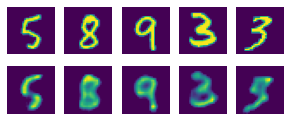

In [10]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)
plt.figure(figsize=(7, 2))
for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
    ax.axis('off')


plt.show()